In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, random_split, DataLoader
import matplotlib.pyplot as plt
import scipy
import scipy.io
from scipy.signal import spectrogram
import os
import soundfile as sf
import librosa
import math
from librosa.feature import melspectrogram
from librosa.display import specshow
import cv2
import random
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report

# Visualize Spectrograms

In [2]:
# Get spect_dataset
class SpectDataset(Dataset):
    def __init__(self, data_dir):
        self.sample_list = []
        
        for filename in os.listdir(data_dir):
            image = plt.imread(f'{data_dir}/{filename}')[:,:,0]
            label = int(filename.split('-')[0][-1])
            self.sample_list.append((label, torch.tensor(image), filename)) #class_label, data, filename
                
    
    def __len__(self):
        return len(self.sample_list)
    
    def __getitem__(self, idx):
        return self.sample_list[idx]

In [3]:
# Load the data (spectrogram)
trainset = SpectDataset('../Datasets/train/Spectrograms')
valset = SpectDataset('../Datasets/val/Spectrograms')
testset = SpectDataset('../Datasets/test/Spectrograms')

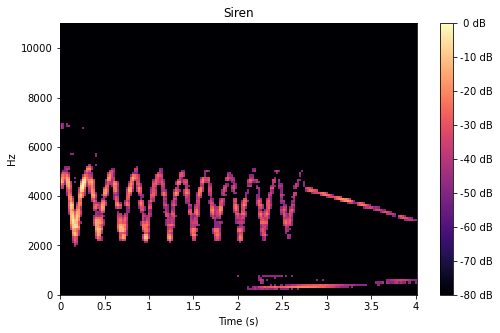

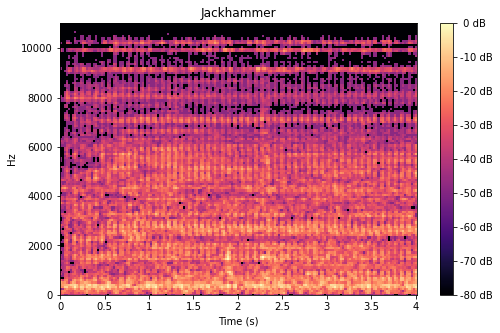

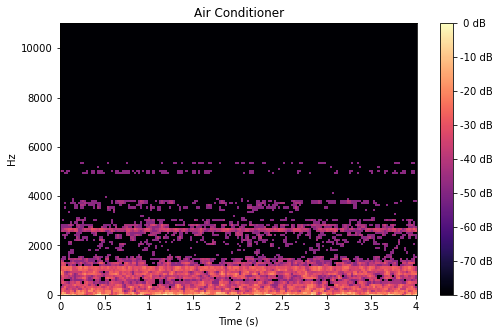

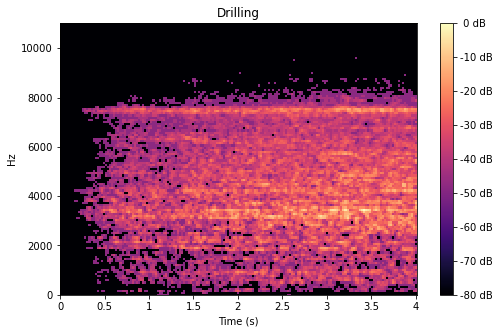

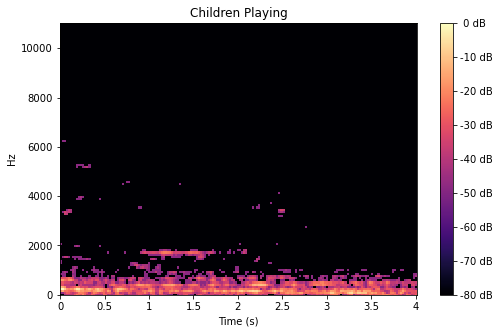

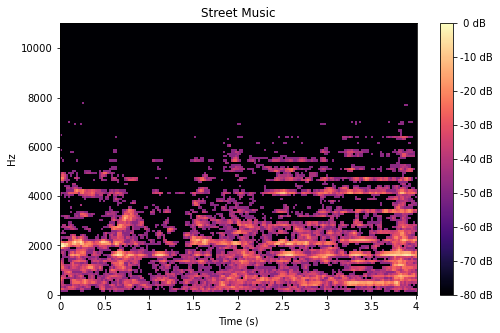

In [8]:
class_dict = {0: 'Siren',
              1: 'Jackhammer',
              2: 'Air Conditioner',
              3: 'Drilling',
              4: 'Children Playing',
              5: 'Street Music',
              6: 'Dog Bark',
              7: 'Engine Idling',
              8: 'Car Horn'}


def visualize_spectra(data_indices):
    sr = 22050     
    for index in data_indices:
        fig = plt.figure(figsize=(8,5))
        sample = trainset[index]
        spect = sample[1]
        class_name = class_dict[sample[0]]
        spect = spect.numpy()
        spect_db = librosa.power_to_db(spect**2)
        librosa.display.specshow(spect_db, sr=sr, x_axis='time', y_axis='linear')
        plt.colorbar(format='%2.0f dB')
        plt.xlabel('Time (s)')
        plt.title(f'{class_name}')
    

data_indices = (500, 601, 1100, 1900, 2500, 3200)
visualize_spectra(data_indices)

# Everything below is scratch work

In [90]:
# Sample rate test
# Try with 1D convolution

# Get dataset
class_dict = {'siren': 0,
             'jackhammer': 1,
             'air_conditioner': 2,
             'drilling': 3,
             'children_playing': 4,
             'street_music': 5,
             'dog_bark': 6,
             'engine_idling': 7,
             'gun_shot': 8,
             'car_horn': 9}

class SoundDataset(Dataset):
    def __init__(self, data_dir):
        self.sample_list = []
        
        for filename in os.listdir(data_dir):
            data, samplerate = librosa.load(f'{data_dir}/{filename}')
            label = int(filename.split('-')[0][-1])
            self.sample_list.append((label, torch.tensor(data), filename, samplerate))
    
    def __len__(self):
        return len(self.sample_list)
    
    def __getitem__(self, idx):
        return self.sample_list[idx]
    
# Load the data (audio)
trainset = SoundDataset('../Datasets/train/Raw')
valset = SoundDataset('../Datasets/val/Raw')
testset = SoundDataset('../Datasets/test/Raw')